<h1>Install Required Libraries</h1>

In [ ]:
# Install the VADER sentiment analysis tool
!pip install vaderSentiment

# Install emoji library for cleaning text
!pip install emoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 3.0 MB/s eta 0:00:00


<h1>Import Required Libraries</h1>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, precision_recall_fscore_support
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import emoji


<h1>Upload Files</h1>

In [ ]:
# Upload files from local machine
from google.colab import files
files.upload()

# Read the uploaded CSV files
df = pd.read_csv("stocktweetsfinal.csv")
df1 = pd.read_csv("stockNewsNYT.csv")
df2 = pd.read_csv("StockFinanceData.csv")


Saving StockFinanceData.csv to StockFinanceData (2).csv
Saving stocktweetsfinal.csv to stocktweetsfinal.csv
Saving stockNewsNYT.csv to stockNewsNYT.csv


<h1>Data Preprocessing</h1>

In [ ]:
# Convert 'headline' column to string type
df1['headline'] = df1['headline'].astype(str)

In [ ]:
# Group headlines by date and concatenate them
df3 = df1.groupby('date')['headline'].apply(lambda x: ' | '.join(x)).reset_index()
df3['Date'] = df3['date']
df3.drop('date', axis=1, inplace=True)

In [ ]:
# Convert 'Date' columns to datetime format
df2['Date'] = pd.to_datetime(df2['Date'], format='%d/%m/%y')
df['Date'] = pd.to_datetime(df['Date'])


<ipython-input-10-a1b7f9c935e3>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
# Create 'Label' column based on stock price movement
df2['Label'] = df2.apply(lambda row: 1 if row['Close'] > row['Open'] else 0, axis=1)

In [ ]:
# Merge tweet columns into one and drop individual columns
df['Headlines'] = df.iloc[:, 3:].fillna('').apply(lambda x: ' '.join(x), axis=1)
df = df.drop(df.iloc[:, 3:18], axis=1)


In [ ]:
df.head()

,Close,Adj Close,Volume,Open,High,Low,Subjectivity,Polarity,Negative,Positive,Neutral,Label
0,102.900002,102.900002,57636700,102.080002,104.440002,101.989998,0.495000,0.258000,0.012,0.133,0.855,1
1,139.869995,139.869995,82989200,143.929993,146.300003,138.520004,0.397980,0.237121,0.000,0.093,0.907,0
2,138.550003,138.550003,42224300,141.289993,141.369995,135.820007,0.269213,0.072024,0.015,0.147,0.839,0
3,109.160004,109.160004,55631900,106.279999,109.879997,106.250000,0.532752,0.281770,0.049,0.107,0.843,1
4,111.989998,111.989998,46900200,110.500000,112.220001,109.629997,0.537183,0.350357,0.021,0.123,0.856,1


In [ ]:
df1.head()

,headline,date,web_url,doc_type,lead_paragraph,material_type,author,section,subsection,keywords
0,How Will Joe Biden Be Remembered in 50 Years?,2023-02-01,https://www.nytimes.com/2023/01/31/opinion/joe...,article,"A half-century from now, Joe Biden’s presidenc...",Op-Ed,By Bret Stephens,Opinion,NaN,"['International Relations', 'Defense and Milit..."
1,Air Force Says Proposed Chinese-Owned Mill in ...,2023-02-01,https://www.nytimes.com/2023/01/31/us/corn-mil...,article,After more than a year of debate about whether...,News,By Mitch Smith,U.S.,NaN,"['Economic Conditions and Trends', 'United Sta..."
2,U.S. Charges Four in Connection With the Assas...,2023-02-01,https://www.nytimes.com/2023/01/31/us/politics...,article,WASHINGTON — Three Haitian Americans and a Col...,News,By Chris Cameron,U.S.,Politics,['Assassinations and Attempted Assassinations'...
3,Creator of Divisive King Monument Builds Sculp...,2023-02-01,https://www.nytimes.com/2023/01/31/arts/super-...,article,Follow our live updates of the Super Bowl betw...,News,By Kalia Richardson,Arts,NaN,"['Super Bowl', 'Football', 'Sculpture']"
4,"DeSantis Takes On the Education Establishment,...",2023-02-01,https://www.nytimes.com/2023/01/31/us/governor...,article,"Gov. Ron DeSantis of Florida, as he positions ...",News,"By Stephanie Saul, Patricia Mazzei and Trip Ga...",U.S.,NaN,"['Politics and Government', 'Conservatism (US ..."


In [ ]:
df3.head()

,headline,Date
0,21 People Rescued After a Freezing Night Stran...,2022-01-02
1,Jan. 6 Panel Faces Difficult Questions as Anni...,2022-01-03
2,A Frazzled America Staggers Into 2022 | The Vi...,2022-01-04
3,How to Stop Trump and Prevent Another Jan. 6 |...,2022-01-05
4,How Many Americans Support Political Violence?...,2022-01-06


In [ ]:
df3.rename(columns={'headline': 'Headlines'}, inplace=True)

In [ ]:
df3.drop(index=729, inplace=True)

In [ ]:
# Merge dataframes df and df3 on 'Date'
df3['Date'] = pd.to_datetime(df3['Date'], format='%Y-%m-%d')
merged_df = pd.merge(df, df3[['Date', 'Headlines']], on='Date', how='left')
merged_df['Headlines'] = merged_df['Headlines_y'].fillna(merged_df['Headlines_x'])
merged_df.drop(columns=['Headlines_x', 'Headlines_y'], inplace=True)

In [ ]:
# Clean headlines in 'Headlines' column
def clean_headline(headline):
    headline = re.sub(r'http\S+', '', headline)
    headline = re.sub(r'[^\w\s]', '', headline)
    headline = emoji.demojize(headline)
    headline = re.sub(r'NaN', '', headline)
    headline = re.sub(r'nan', '', headline)
    headline = re.sub(r'\s+', ' ', headline)
    return headline.lower().strip()

merged_df['Headlines'] = merged_df['Headlines'].apply(clean_headline)

<h1>Sentiment Analysis</h1>

In [ ]:
# Function to calculate subjectivity using TextBlob
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Function to calculate polarity using TextBlob
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
# Merge financial data with tweets data on 'Date' and 'Stock Name'
merged_df = merged_df.merge(df2, on=['Date', 'Stock Name'], how='inner')

In [ ]:
# Apply subjectivity and polarity calculations
merged_df['Subjectivity'] = merged_df['Headlines'].apply(getSubjectivity)
merged_df['Polarity'] = merged_df['Headlines'].apply(getPolarity)

In [ ]:
# Function to get sentiment scores using VADER
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

In [ ]:
# Apply VADER sentiment analysis
compound, neg, pos, neu = [], [], [], []
for i in range(len(merged_df['Headlines'])):
    SIA = getSIA(merged_df['Headlines'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

In [ ]:
# Add sentiment scores to dataframe
merged_df['Compound'] = compound
merged_df['Negative'] = neg
merged_df['Positive'] = pos
merged_df['Neutral'] = neu

<h1>Data Preparation for Model Training</h1>

In [ ]:
# Select relevant columns for modeling
keep_columns = ['Close', 'Adj Close', 'Volume', 'Open', 'High', 'Low', 'Subjectivity', 'Polarity', 'Negative', 'Positive', 'Neutral', 'Label']
df = merged_df[keep_columns]


In [ ]:

# Define feature matrix (X) and target vector (y)
X = df.drop(['Label'], axis=1).values
y = df['Label'].values


In [ ]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


<h1>Model Training and Evaluation</h1>

In [ ]:
# Train a Linear Discriminant Analysis model
lda_model = LinearDiscriminantAnalysis().fit(x_train, y_train)

# Predict using the LDA model
lda_predictions = lda_model.predict(x_test)
lda_pred_proba = lda_model.predict_proba(x_test)



In [ ]:
# Function to print evaluation metrics
def print_evaluation_metrics(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    print(f'{model_name} Classification Report:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')
    print(confusion_matrix(y_test, y_pred))
    print()


In [ ]:
# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()


LDA Classification Report:
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1-score: 0.96
[[229  16]
 [  2 233]]



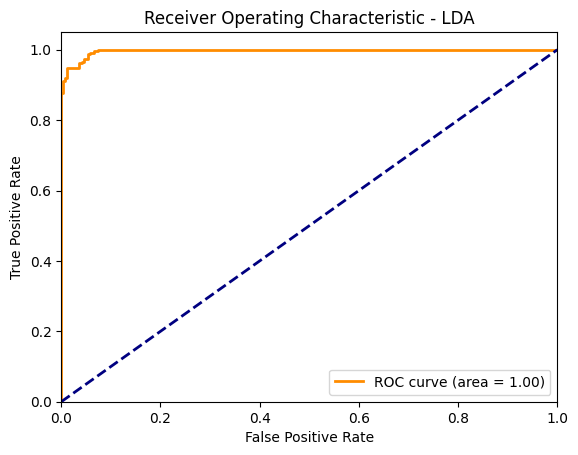

In [ ]:
# Print evaluation metrics and plot ROC curve for LDA model
print_evaluation_metrics(y_test, lda_predictions, 'LDA')
plot_roc_curve(y_test, lda_pred_proba, 'LDA')

<h1>Logistic Regression Model</h1>

Logistic Regression Classification Report:
Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1-score: 0.84
[[210  35]
 [ 40 195]]



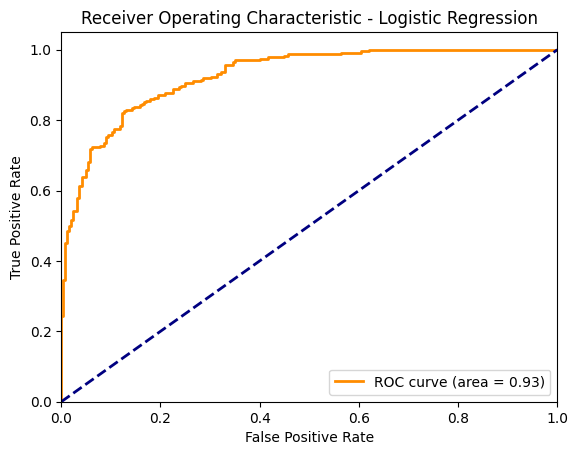

In [ ]:
# Train a Logistic Regression model
lr_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])
lr_model.fit(x_train, y_train)

# Predict using the Logistic Regression model
lr_predictions = lr_model.predict(x_test)
lr_pred_proba = lr_model.predict_proba(x_test)

# Print evaluation metrics and plot ROC curve for Logistic Regression model
print_evaluation_metrics(y_test, lr_predictions, 'Logistic Regression')
plot_roc_curve(y_test, lr_pred_proba, 'Logistic Regression')


<h1>Reset Index for Merged DataFrame</h1>

In [ ]:
# Reset index for the merged dataframe
merged_df.reset_index(drop=True, inplace=True)


<h1>Aspect-Based Sentiment Analysis</h1>

In [ ]:
# Function to perform aspect-based sentiment analysis
def aspect_based_sentiment_analysis(text, aspect):
    if aspect in text:
        return 1  # Positive sentiment towards the aspect
    else:
        return 0  # No significant sentiment towards the aspect

# Apply aspect-based sentiment analysis for 'earnings'
merged_df['Earnings_Sentiment'] = merged_df['Headlines'].apply(lambda x: aspect_based_sentiment_analysis(x, 'earnings'))


<h1>Generate Trading Signals
</h1>

In [ ]:
# Generate buy/sell signals based on sentiment
merged_df['Signal'] = 0
merged_df.loc[merged_df['Compound'] > 0.2, 'Signal'] = 1
merged_df.loc[merged_df['Compound'] < -0.2, 'Signal'] = -1

# Adjust signals with Earnings_Sentiment
merged_df.loc[merged_df['Earnings_Sentiment'] == 1, 'Signal'] = 1

# Generate positions based on signals
merged_df['Position'] = merged_df['Signal'].replace(0, np.nan).ffill().shift(1).fillna(0)


<h1>Portfolio Value Calculation</h1>

In [ ]:
# Initialize portfolio
initial_cash = 100000
merged_df['Market_Return'] = merged_df['Close'].pct_change()
merged_df['Strategy_Return'] = merged_df['Market_Return'] * merged_df['Position']

# Calculate portfolio value
merged_df['Portfolio_Value'] = initial_cash * (1 + merged_df['Strategy_Return']).cumprod()


<h1>Drawdown Calculation</h1>

In [ ]:
# Function to calculate drawdown
def calculate_drawdown(portfolio_values):
    running_max = np.maximum.accumulate(portfolio_values)
    drawdown = (running_max - portfolio_values) / running_max
    return drawdown

# Group by 'Stock Name' and calculate metrics for each group
grouped = merged_df.groupby('Stock Name')
for name, group in grouped:
    group['Drawdown'] = calculate_drawdown(group['Portfolio_Value'])
    max_drawdown = group['Drawdown'].max()

    daily_returns = group['Strategy_Return'].dropna()
    excess_returns = daily_returns - 0.02 / 252
    sharpe_ratio = np.sqrt(252) * (excess_returns.mean() / excess_returns.std())

    num_trades = (group['Signal'] != 0).sum()
    winning_trades = (group['Strategy_Return'] > 0).sum()
    win_ratio = winning_trades / num_trades if num_trades > 0 else 0

    # Print metrics for the company
    print(f"Company: {name}")
    print(f"  Maximum Drawdown: {max_drawdown:.2%}")
    print(f"  Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"  Number of Trades Executed: {num_trades}")
    print(f"  Win Ratio: {win_ratio:.2%}")
    print()


Company: AAPL
  Maximum Drawdown: -0.00%
  Sharpe Ratio: 1.21
  Number of Trades Executed: 210
  Win Ratio: 56.19%

Company: AMD
  Maximum Drawdown: nan%
  Sharpe Ratio: 0.48
  Number of Trades Executed: 209
  Win Ratio: 53.59%

Company: AMZN
  Maximum Drawdown: -0.00%
  Sharpe Ratio: 0.12
  Number of Trades Executed: 209
  Win Ratio: 52.15%

Company: BA
  Maximum Drawdown: 89.98%
  Sharpe Ratio: 0.42
  Number of Trades Executed: 119
  Win Ratio: 53.78%

Company: BX
  Maximum Drawdown: -0.00%
  Sharpe Ratio: 3.91
  Number of Trades Executed: 21
  Win Ratio: 61.90%

Company: COST
  Maximum Drawdown: 45.38%
  Sharpe Ratio: -1.32
  Number of Trades Executed: 121
  Win Ratio: 57.85%

Company: DIS
  Maximum Drawdown: -0.00%
  Sharpe Ratio: 0.01
  Number of Trades Executed: 135
  Win Ratio: 59.26%

Company: ENPH
  Maximum Drawdown: 81.06%
  Sharpe Ratio: 1.82
  Number of Trades Executed: 72
  Win Ratio: 48.61%

Company: F
  Maximum Drawdown: 24.24%
  Sharpe Ratio: 5.40
  Number of Trades Exe

<h1>Plotting Stock Prices with Buy/Sell Signals</h1>

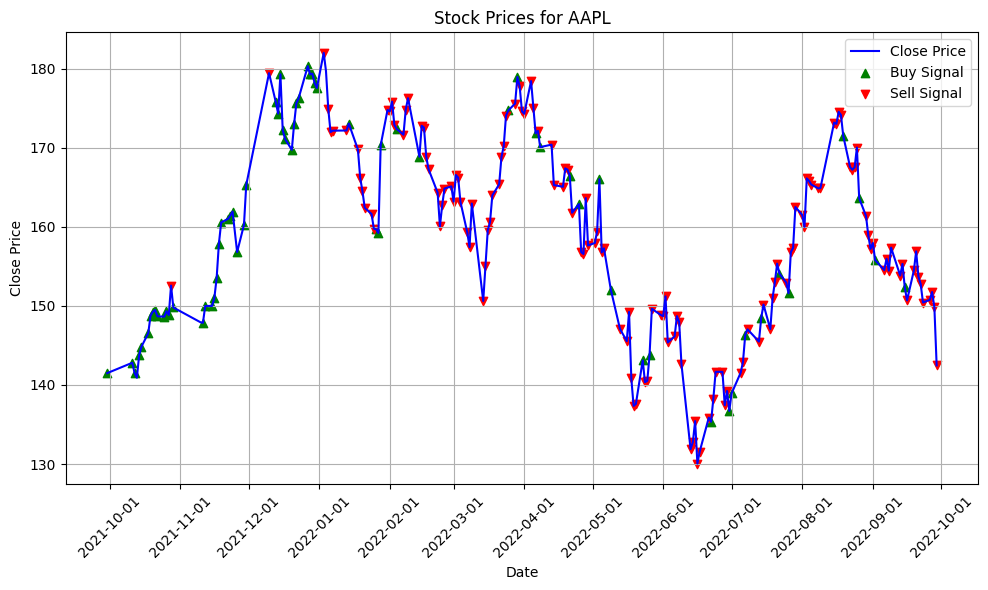

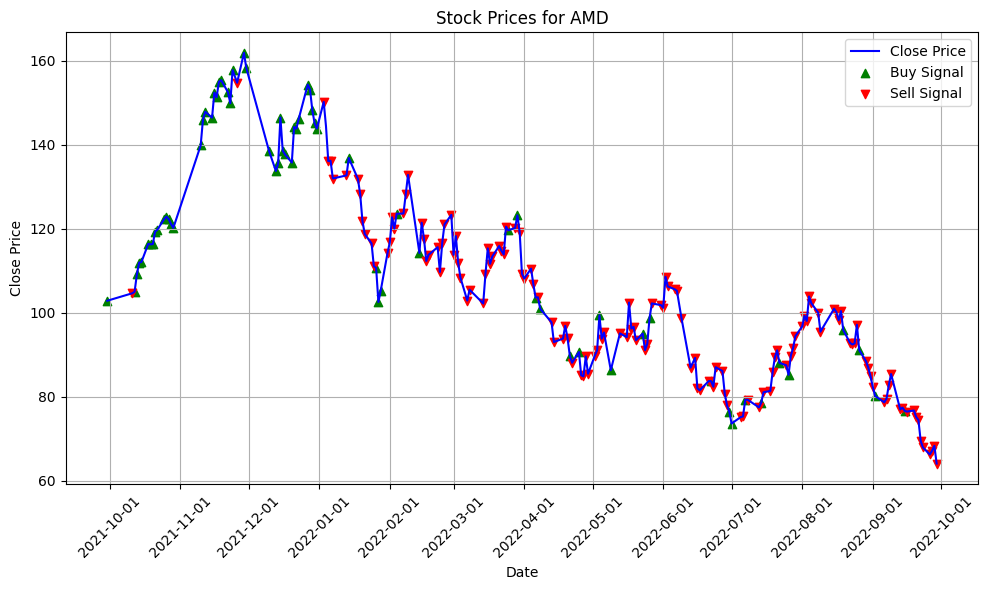

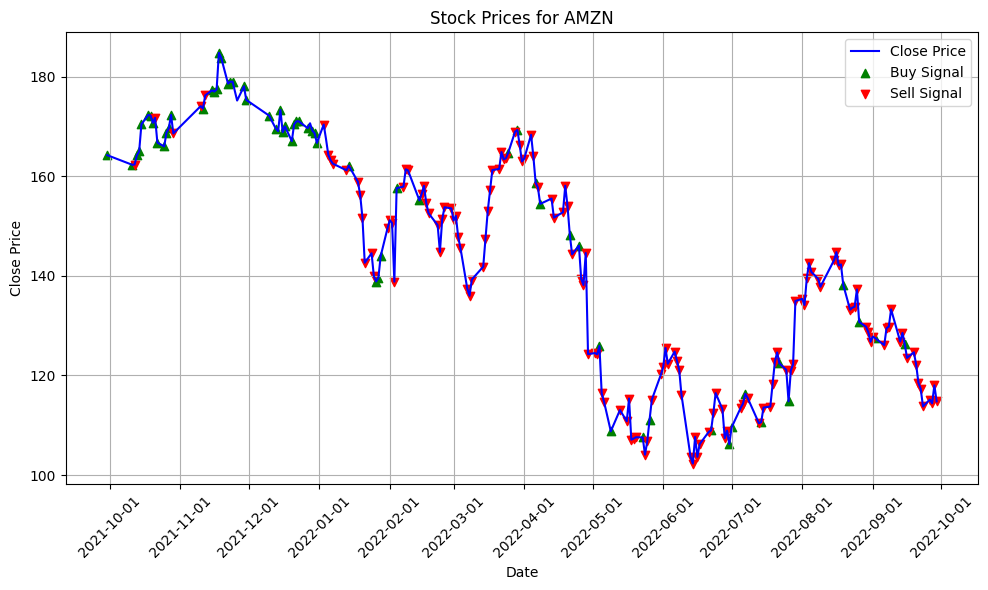

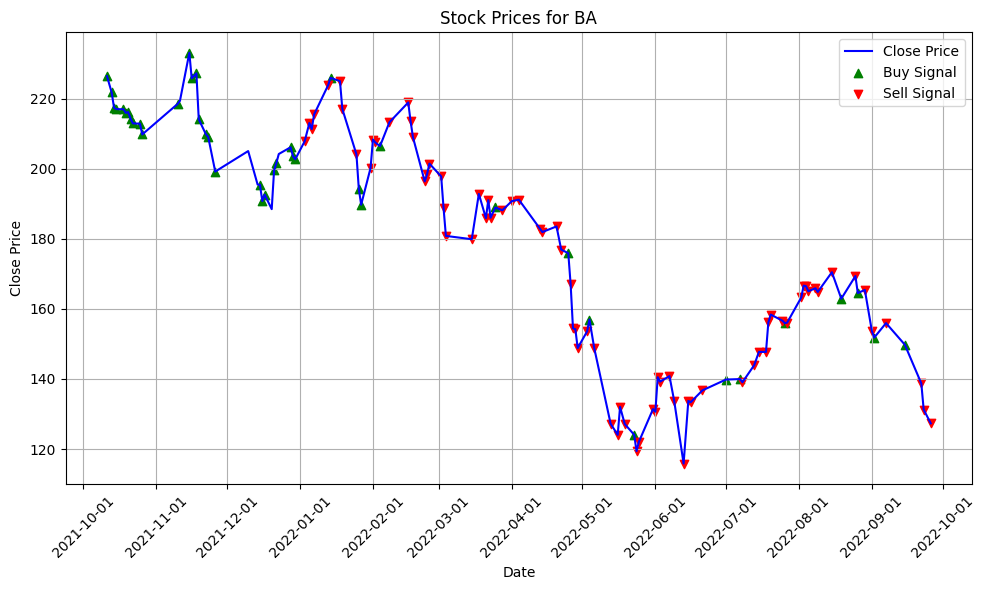

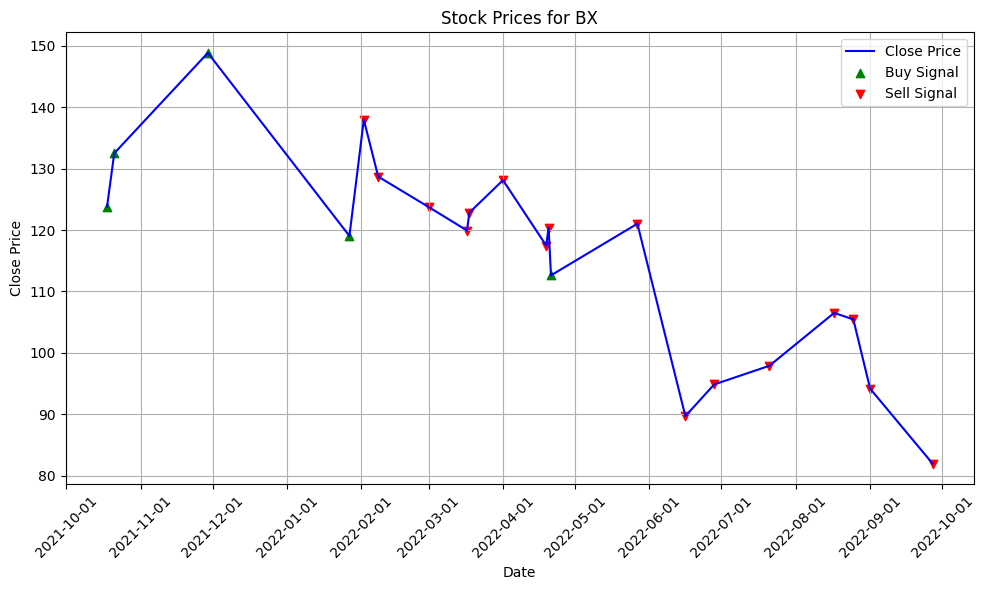

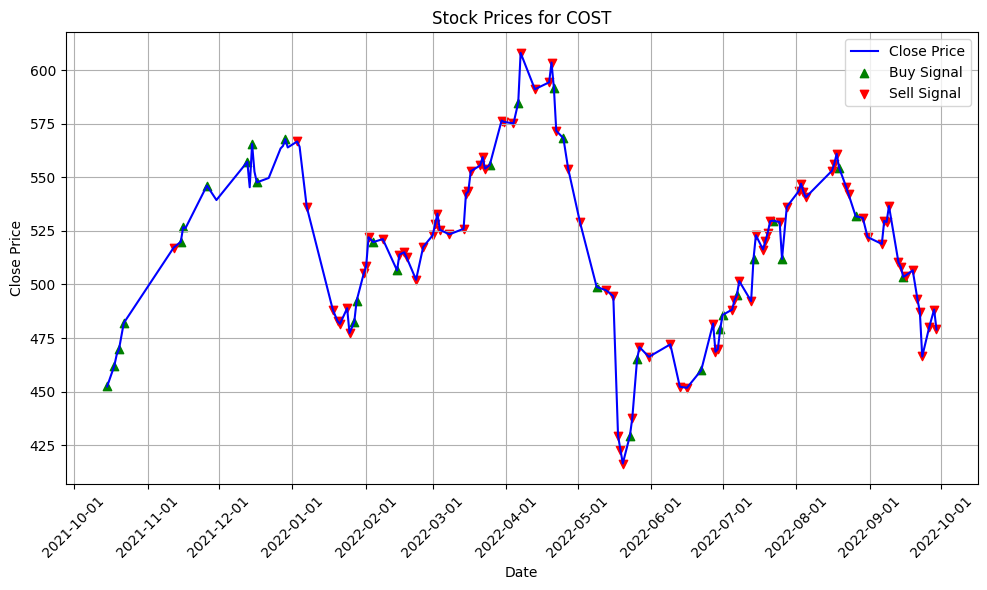

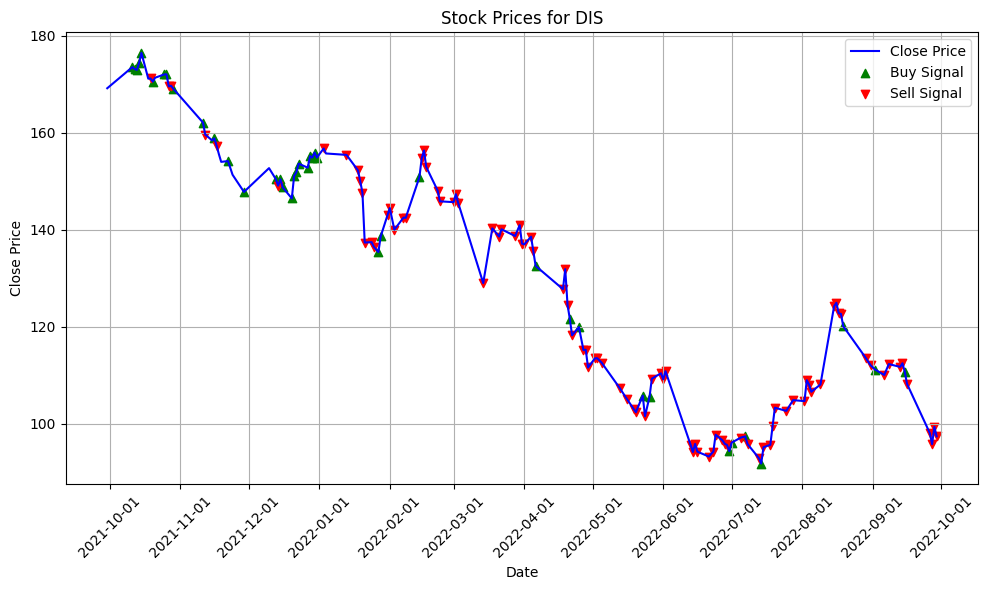

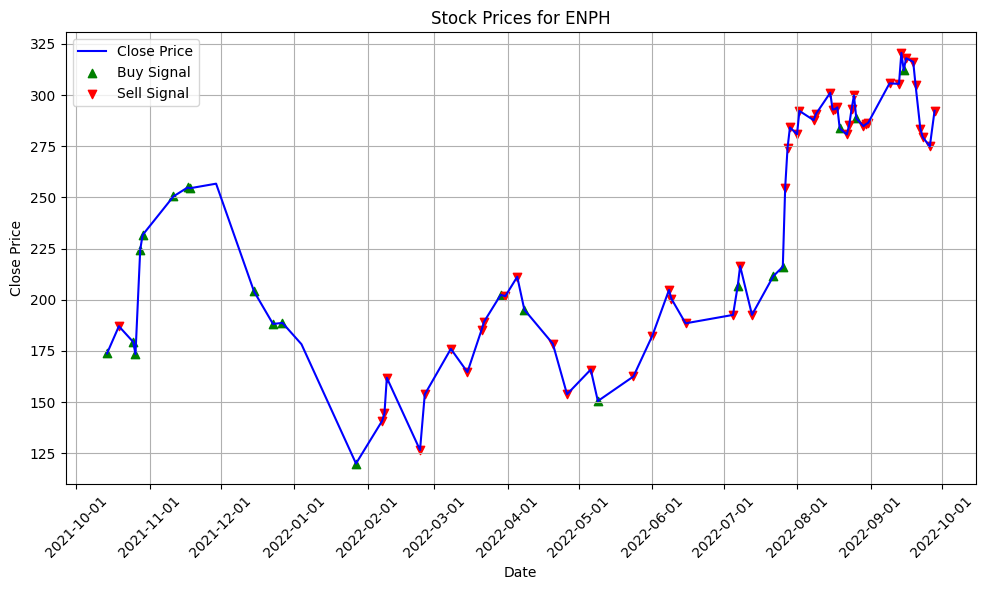

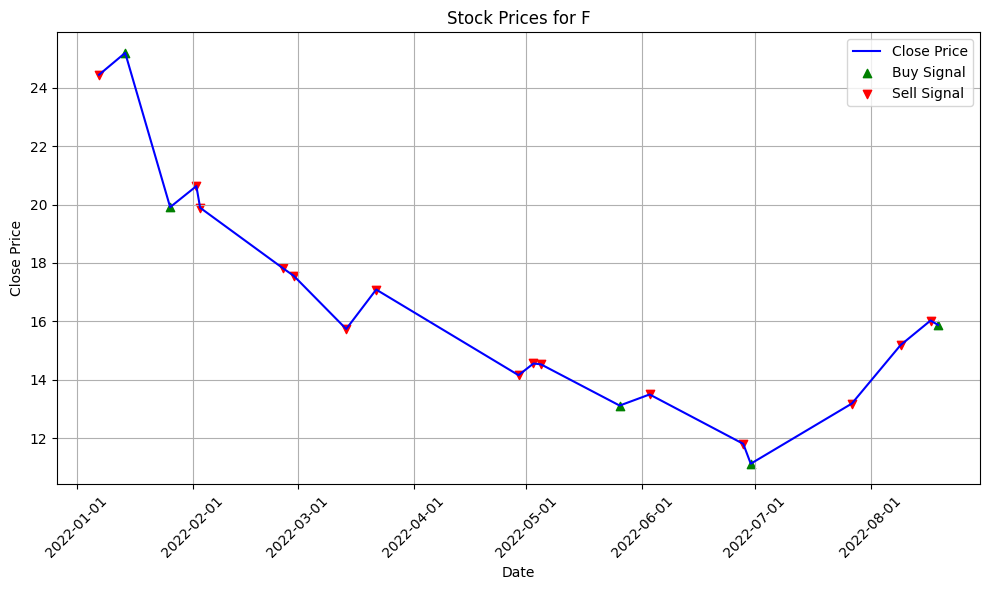

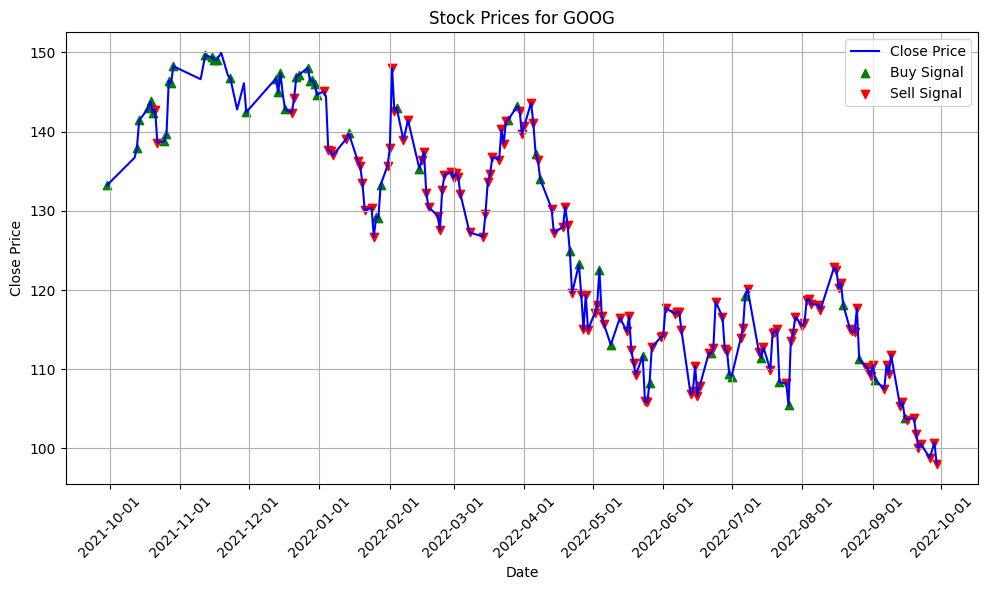

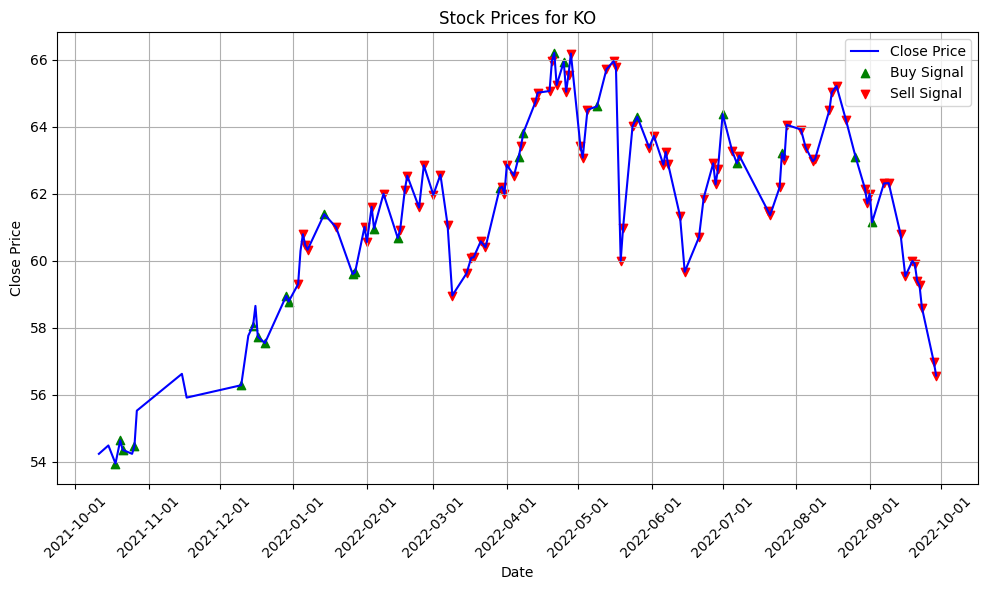

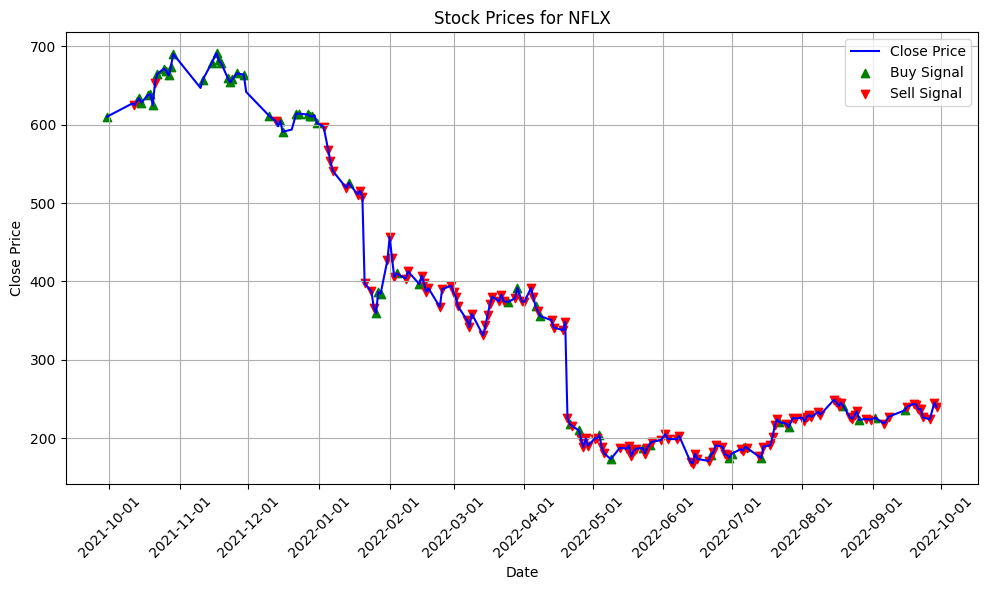

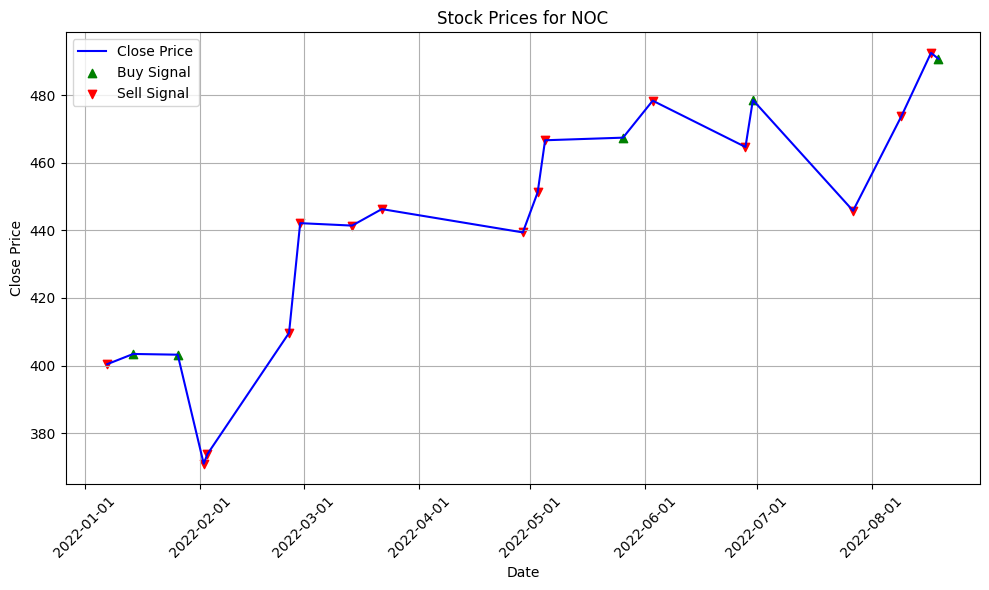

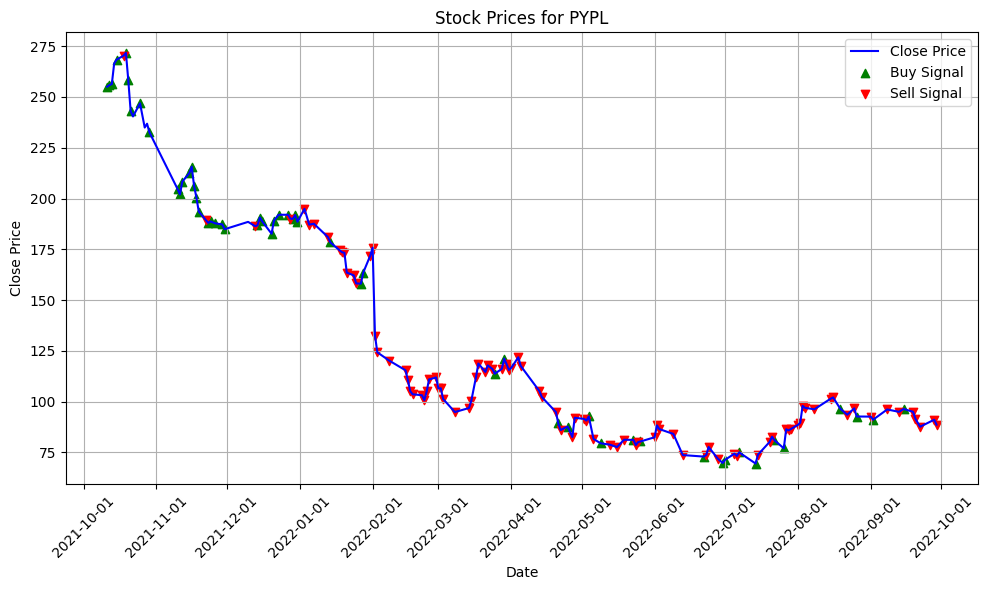

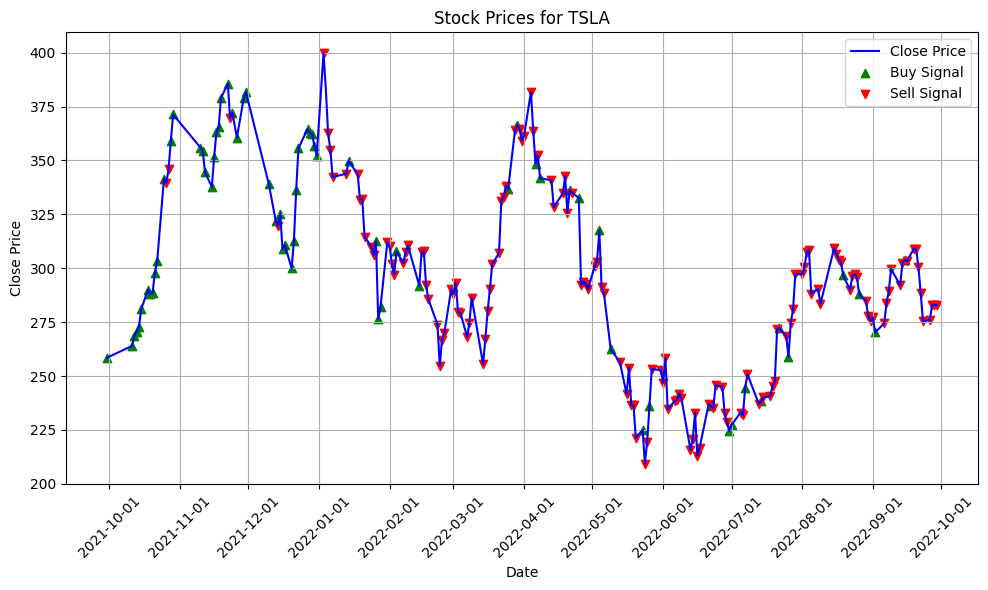

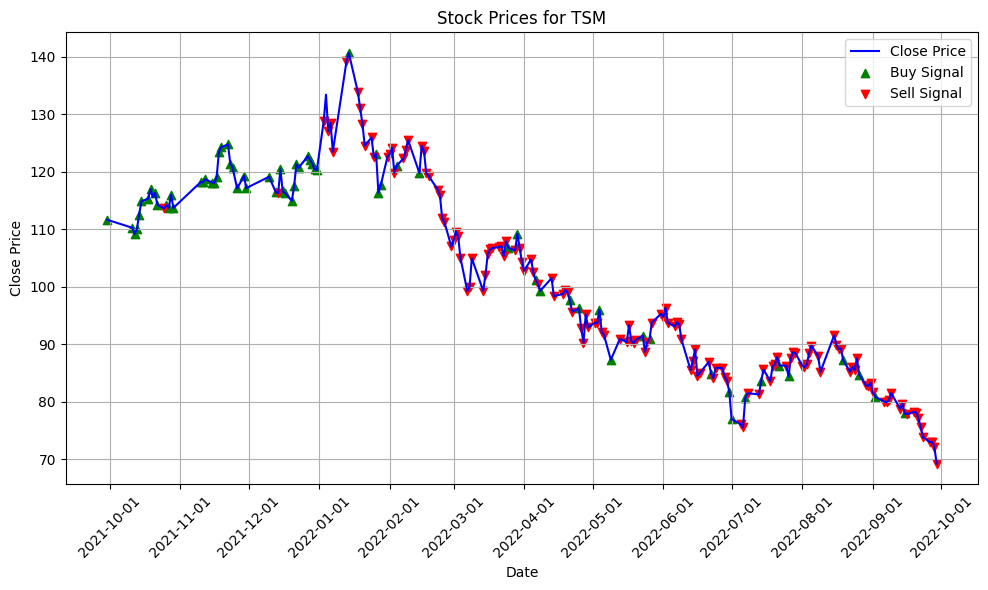

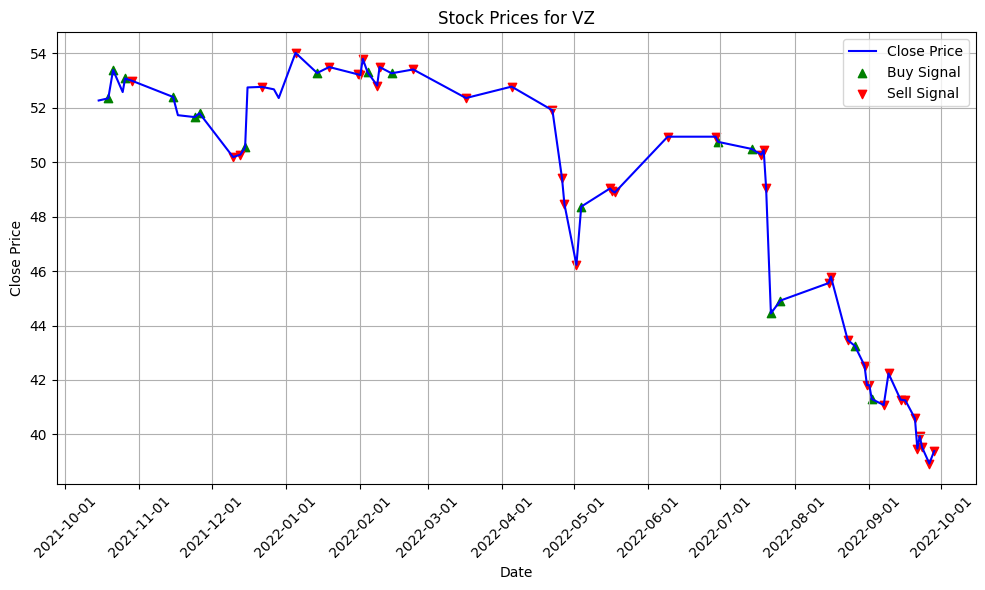

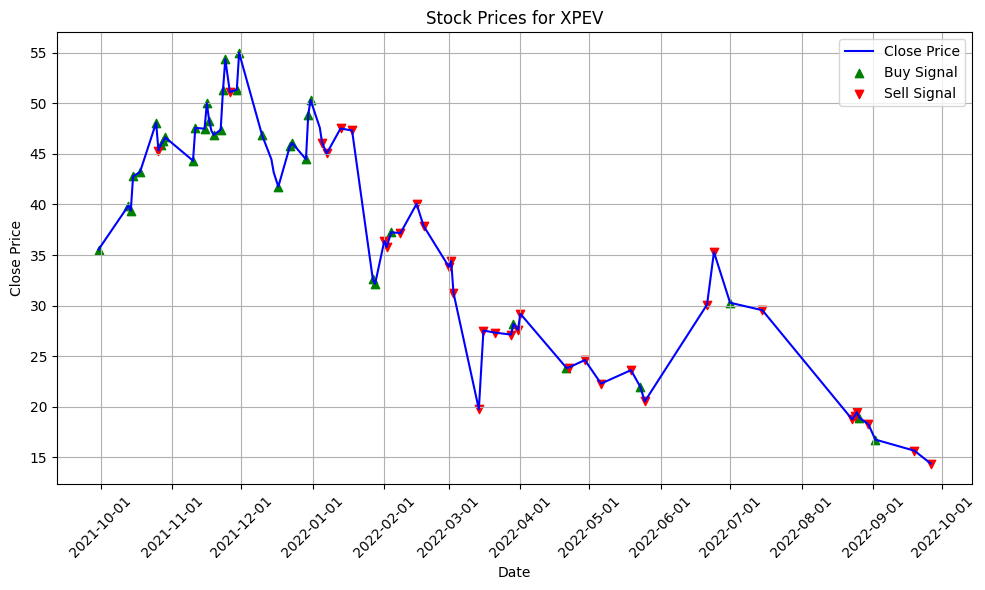

In [ ]:
# Ensure 'Date' column is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Sort DataFrame by 'Date'
merged_df = merged_df.sort_values('Date')

# Group by 'Stock Name' and create subplots for each group
grouped = merged_df.groupby('Stock Name')
for name, group in grouped:
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot stock prices
    ax.plot(group['Date'], group['Close'], label='Close Price', color='b')

    # Plot buy signals
    buy_signals = group[group['Signal'] == 1]
    ax.scatter(buy_signals['Date'], buy_signals['Close'], marker='^', color='g', label='Buy Signal')

    # Plot sell signals
    sell_signals = group[group['Signal'] == -1]
    ax.scatter(sell_signals['Date'], sell_signals['Close'], marker='v', color='r', label='Sell Signal')

    # Customize plot
    ax.set_title(f'Stock Prices for {name}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    ax.legend()
    ax.grid(True)

    # Set x-axis major locator to month and format the dates
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()


<h1>Confusion Matrix</h1>

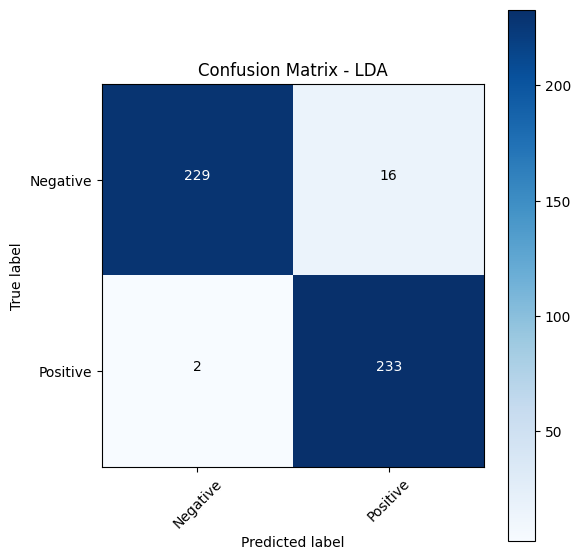

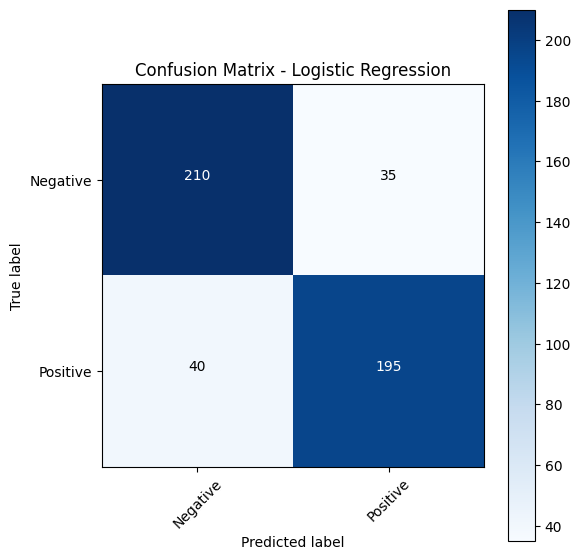

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Negative', 'Positive'], rotation=45)
    plt.yticks(tick_marks, ['Negative', 'Positive'])

    fmt = 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Assuming lda_predictions and lr_predictions are the predictions from your LDA and Logistic Regression models
# Replace lda_predictions and lr_predictions with the actual variable names if different

# Plot confusion matrix for LDA model
plot_confusion_matrix(y_test, lda_predictions, 'LDA')

# Plot confusion matrix for Logistic Regression model
plot_confusion_matrix(y_test, lr_predictions, 'Logistic Regression')

# Show the plots
plt.show()
